# Uncapacitated Facility Location Problem

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

sys.path.append("..")
from lp.uflp import UFLP


## Load the data

In [2]:
# import the data and parameters and check the data

data_path = "data/"

# ====Parameters==== #
parameters = pd.read_csv(os.path.join(data_path, "parametros.csv"))
# 1. food_per_person_per_day in tons per day
food_per_person_per_day = float(
    parameters.loc[parameters["parametro"] == "comida_por_persona_en_toneladas"].values[
        0
    ][1]
)
# 2. transport_cost_per_ton_per_km in COP per ton per km
transport_cost_per_ton_per_km = float(
    parameters.loc[
        parameters["parametro"] == "costo_de_transporte_por_tonelada_por_kilomentro"
    ].values[0][1]
)

print(
    f"parameters: \n    food_per_person_per_day: {food_per_person_per_day} \n    transport_cost_per_ton_per_km: {transport_cost_per_ton_per_km}\n"
)
# ====Parameters==== #

# ====importData==== #
# 1. population, from data/municipios_procesado.csv
population = pd.read_csv(
    os.path.join(data_path, "municipios_procesado.csv"), index_col=3
)
# 2. distance, from data/distance_matrix_final.csv
distance = pd.read_csv(
    os.path.join(data_path, "distance_matrix_final.csv"), index_col=0
)
# 3. warehouses, from data/almacenes.csv
warehouses = pd.read_csv(os.path.join(data_path, "almacenes.csv"))
# ====importData==== #

# ====DataProcessing===== #
# fill the nan values in population with the minimum '2024' from the departamento of Chocó for the columns 22:
population.loc[population.isna().any(axis=1), population.columns[18:]] = (
    population[
        population["2024"]
        == population.loc[population["departamento"] == "Chocó"]["2024"].min()
    ]
    .iloc[0, 18:]
    .values
)
# drop the municipalities with nan values in the first column of the distance matrix
distance = distance.dropna(subset=[distance.columns[0]], axis=0)
distance = distance.dropna(subset=[distance.index[0]], axis=1)
# select only the rows in population dpmp that the index is in distance
population = population.loc[distance.index]
# turn the columns of distance into integers
distance.columns = distance.columns.astype(int)
print(
    f"data information: \n    population: {population.shape} \n    distance: {distance.shape} \n    warehouses: \n {warehouses} \n"
)
# ====DataProcessing===== #

# ====DataInformation==== #
# Memory usage of the data
print(f"population memory usage: {population.memory_usage().sum()/1024**2:.2f} MB")
print(f"distance memory usage: {distance.memory_usage().sum()/1024**2:.2f} MB")
print(f"warehouses memory usage: {warehouses.memory_usage().sum()/1024**2:.2f} MB")
# ====DataInformation==== #

# ====DataChecking==== #
# Test to the data if needed
# ====DataChecking==== #


parameters: 
    food_per_person_per_day: 0.00087617 
    transport_cost_per_ton_per_km: 3364.0

data information: 
    population: (1117, 71) 
    distance: (1117, 1117) 
    warehouses: 
    Type  capacity_ton        cost
0     1          1074   731159925
1     2          2418  1129212606
2     3          9672  4516850424 

population memory usage: 0.61 MB
distance memory usage: 9.56 MB
warehouses memory usage: 0.00 MB


## 1. Checking the normal distribution distances between the facilities and the customers


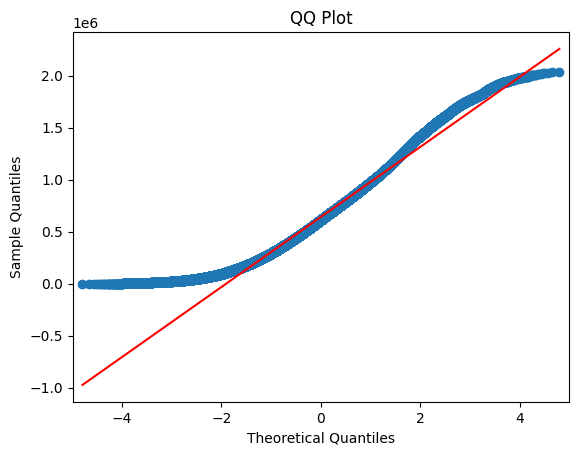

In [19]:
from scipy import stats
from scipy import stats

flatt_distance = distance.stack().reset_index()[0]
# values > 0 and < 2.2 M
flatt_distance = flatt_distance[(flatt_distance > 0) & (flatt_distance < 2.2e6)]

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create the QQ plot
sm.qqplot(flatt_distance, line="s")

# Set plot title and labels
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()


<Axes: >

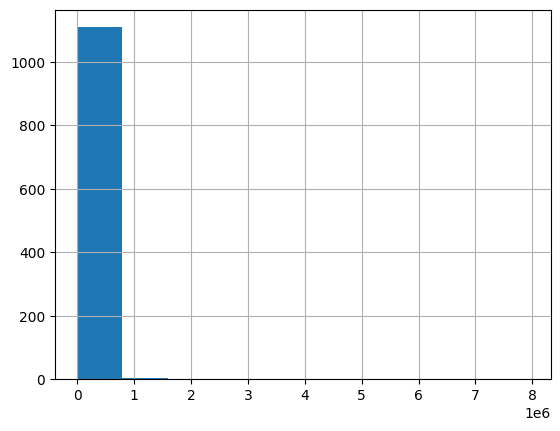

In [21]:
population["2024"].hist(bins=10)
